In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Real = pd.read_csv("True.csv")
Fake = pd.read_csv("Fake.csv")

In [3]:
Real['news_category'] = 1
Fake['news_category'] = 0

In [4]:
data = pd.concat([Real, Fake])

In [5]:
data = data.reset_index(drop=True)

In [6]:
from sklearn.utils import shuffle
data = shuffle(data)

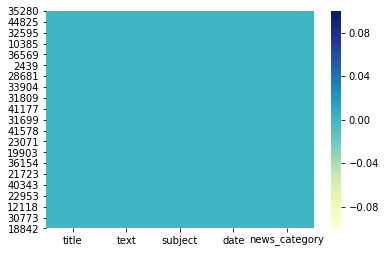

In [7]:
sns.heatmap(data.isnull(), cmap="YlGnBu")

### Word Cloud for real text

In [8]:
from wordcloud import WordCloud,STOPWORDS

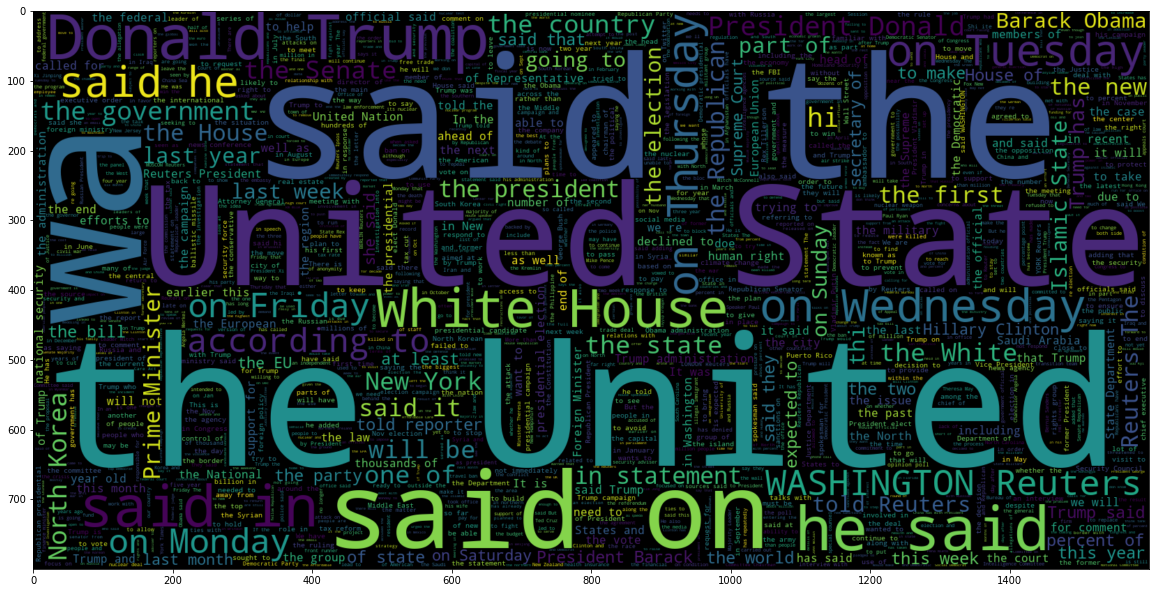

In [9]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data[data.news_category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

### Word Cloud for fake text

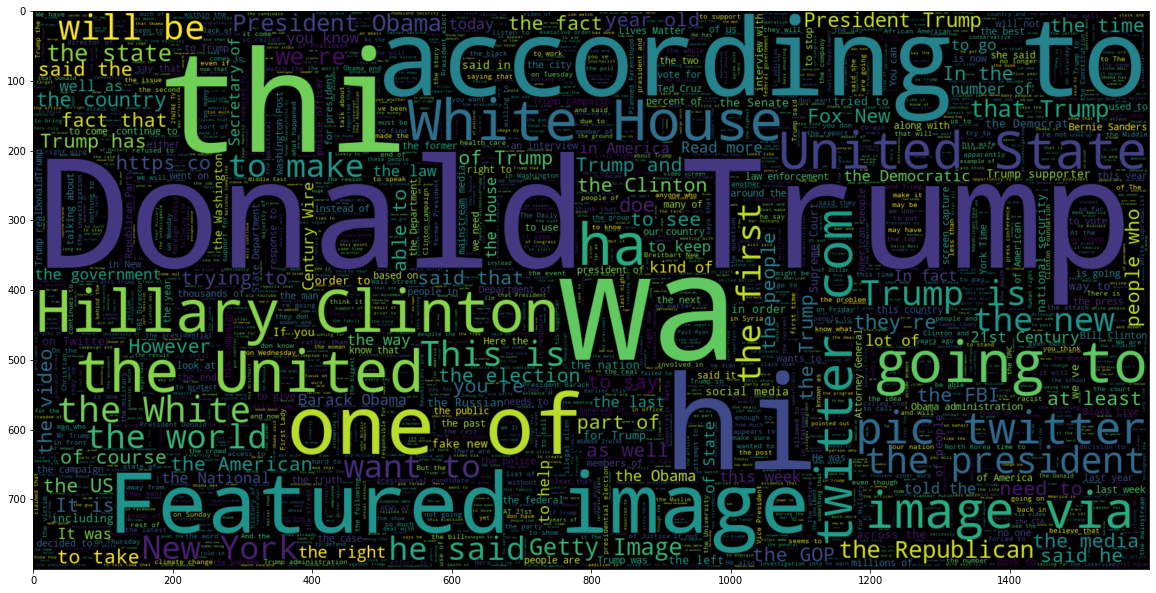

In [10]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data[data.news_category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

In [11]:
data.groupby('news_category').subject.describe()

,count,unique,top,freq
news_category,,,,
0,23481,6,News,9050
1,21417,2,politicsNews,11272


In [12]:
pd.set_option('display.max_colwidth', 500)
data.groupby('news_category')['subject'].unique()

news_category
0    [politics, News, left-news, Government News, Middle-east, US_News]
1                                             [worldnews, politicsNews]
Name: subject, dtype: object

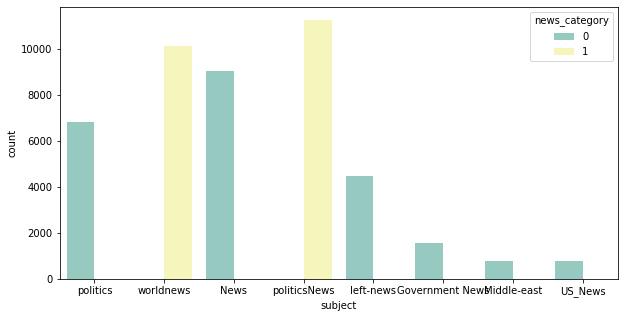

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x= "subject", hue = "news_category", data=data, palette="Set3")

In [14]:
data.head(1)

,title,text,subject,date,news_category
35280,"LOCAL ANCHOR GETS REAL: Clinton Presidency ‘Should Freak People Out’, Will Hurt North Dakota Economy",We ve heard from this local anchor before. He s unafraid to get real with Americans about what s going on in the world. This is great!,politics,"May 21, 2016",0


In [15]:
data['text'] = data['title'] + " " + data['text']

In [16]:
data.head(1)

,title,text,subject,date,news_category
35280,"LOCAL ANCHOR GETS REAL: Clinton Presidency ‘Should Freak People Out’, Will Hurt North Dakota Economy","LOCAL ANCHOR GETS REAL: Clinton Presidency ‘Should Freak People Out’, Will Hurt North Dakota Economy We ve heard from this local anchor before. He s unafraid to get real with Americans about what s going on in the world. This is great!",politics,"May 21, 2016",0


In [17]:
del data['title']
del data['date']
del data['subject']

In [18]:
data.head(1)

,text,news_category
35280,"LOCAL ANCHOR GETS REAL: Clinton Presidency ‘Should Freak People Out’, Will Hurt North Dakota Economy We ve heard from this local anchor before. He s unafraid to get real with Americans about what s going on in the world. This is great!",0


In [19]:
data.columns

Index(['text', 'news_category'], dtype='object')

In [20]:
data['count_of_words'] = data.text.apply(lambda x: len(x.split()))

In [21]:
%time data['count_of_uppercase_words'] = data.text.apply(lambda x: len([word for word in x.split() if word.istitle()]))

CPU times: user 2.59 s, sys: 22 ms, total: 2.61 s
Wall time: 2.73 s


In [22]:
%time data['count_of_characters'] = data['text'].apply(len)

CPU times: user 19.3 ms, sys: 1.7 ms, total: 21 ms
Wall time: 19.6 ms


In [23]:
%time data['avg_len_of_words'] = data['count_of_characters'] / data['count_of_words']

CPU times: user 3.61 ms, sys: 2.14 ms, total: 5.75 ms
Wall time: 3.92 ms


In [24]:
import string
%time data['punctuation_count'] = data['text'].apply(lambda x: len("".join(p for p in x if p in string.punctuation)))

CPU times: user 8.78 s, sys: 61.7 ms, total: 8.84 s
Wall time: 9.09 s


In [25]:
data.head(1)

,text,news_category,count_of_words,count_of_uppercase_words,count_of_characters,avg_len_of_words,punctuation_count
35280,"LOCAL ANCHOR GETS REAL: Clinton Presidency ‘Should Freak People Out’, Will Hurt North Dakota Economy We ve heard from this local anchor before. He s unafraid to get real with Americans about what s going on in the world. This is great!",0,42,15,236,5.619048,5


In [26]:
data.columns, len(data.columns)

(Index(['text', 'news_category', 'count_of_words', 'count_of_uppercase_words',
        'count_of_characters', 'avg_len_of_words', 'punctuation_count'],
       dtype='object'), 7)

In [27]:
data.columns.unique(), len(data.columns.unique())

(Index(['text', 'news_category', 'count_of_words', 'count_of_uppercase_words',
        'count_of_characters', 'avg_len_of_words', 'punctuation_count'],
       dtype='object'), 7)

In [28]:
#len("".join(p for p in data['text'][23467] if p in string.punctuation))

In [29]:
from textblob import TextBlob

In [30]:
pos_family = {'noun' : ['NN','NNS','NNP','NNPS'],'pron' : ['PRP','PRP$','WP','WP$'],
              'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],'adj' :  ['JJ','JJR','JJS'],
              'adv' : ['RB','RBR','RBS','WRB']}

In [31]:
def check_pos_tag(x, flag):
    cnt = 0
    wiki = TextBlob(x)
    for tup in wiki.tags:
        ppo = list(tup)[1]
        if ppo in pos_family[flag]:
            cnt += 1
    return cnt

In [32]:
%time data['noun_count'] = data.text.apply(lambda x: check_pos_tag(x, 'noun'))

CPU times: user 24min 32s, sys: 24.4 s, total: 24min 56s
Wall time: 25min 44s


In [33]:
%time data['verb_count'] = data.text.apply(lambda x: check_pos_tag(x, 'verb'))

CPU times: user 31min 36s, sys: 41.6 s, total: 32min 17s
Wall time: 36min 21s


In [34]:
%time data['adjective_count'] = data.text.apply(lambda x: check_pos_tag(x, 'adj'))

CPU times: user 31min 5s, sys: 44.2 s, total: 31min 50s
Wall time: 36min 35s


In [35]:
%time data['adverb_count'] = data.text.apply(lambda x: check_pos_tag(x, 'adv'))

CPU times: user 24min 56s, sys: 31 s, total: 25min 27s
Wall time: 27min 18s


In [36]:
%time data['pronoun_count'] = data.text.apply(lambda x: check_pos_tag(x, 'pron'))

CPU times: user 23min 4s, sys: 23.8 s, total: 23min 28s
Wall time: 24min 42s


In [37]:
data.columns

Index(['text', 'news_category', 'count_of_words', 'count_of_uppercase_words',
       'count_of_characters', 'avg_len_of_words', 'punctuation_count',
       'noun_count', 'verb_count', 'adjective_count', 'adverb_count',
       'pronoun_count'],
      dtype='object')

In [38]:
len(data.columns), len(data.columns.unique())

(12, 12)

case conversion
remove accented characters
Expanding contractions
Remove numbers, symbols and special characters
lemmatization
stopword removal


In [39]:
data['text'] = data['text'].str.lower()

In [40]:
import unicodedata

def remove_accented_char(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [41]:
data['text'] = data['text'].apply(remove_accented_char)

In [42]:
import contractions
def fix_contractions(text):
    text = contractions.fix(text)
    return text

In [43]:
data['text'] = data['text'].apply(fix_contractions)

In [44]:
import re

def remove_sym_specialchar(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'', text)
    return text

In [45]:
data['text'] = data['text'].apply(remove_sym_specialchar)

In [46]:
#pd.set_option('display.max_colwidth', 50)
#data.head()

In [47]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [48]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

def pos_tag_wordnet(tagged_tokens):
    tag_map = {'j':wordnet.ADJ, 'v':wordnet.VERB, 'n':wordnet.NOUN, 'r':wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN, )) for word, tag in tagged_tokens]
    return new_tagged_tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kavitasurasura/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
def wordnet_lemmatize_text(text):
    # tokenizing and parts of speech tagging
    tagged_tokens = nltk.pos_tag(nltk.word_tokenize(text))
    # convert pos tags to wordnet tags
    wordnet_tokens = pos_tag_wordnet(tagged_tokens)
    lemmatized_text = ' '.join(wnl.lemmatize(word, tag) for word, tag in wordnet_tokens)
    return lemmatized_text

In [50]:
data['text'] = data['text'].apply(wordnet_lemmatize_text)

In [51]:
len(data.columns), len(data.columns.unique())

(12, 12)

In [52]:
data.columns

Index(['text', 'news_category', 'count_of_words', 'count_of_uppercase_words',
       'count_of_characters', 'avg_len_of_words', 'punctuation_count',
       'noun_count', 'verb_count', 'adjective_count', 'adverb_count',
       'pronoun_count'],
      dtype='object')

In [53]:
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [54]:
stop_words = nltk.corpus.stopwords.words('english')

data['text'] = data['text'].apply(remove_stopwords)

In [55]:
len(data.index)

44898

####

In [56]:
#TF:IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=[1,3])

%time data_tfidf = tfidf_vectorizer.fit_transform(data['text'])
display("TF:IDF :", data_tfidf.shape)
df_tfidf = pd.DataFrame(data_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=data.index)
display(df_tfidf.head())

CPU times: user 2min 6s, sys: 5.81 s, total: 2min 12s
Wall time: 2min 17s


'TF:IDF :'

(44898, 1666)

,10,100,11,12,13,14,15,16,17,18,...,yous,yous government,yous house,yous official,yous president,yous president donald,yous presidential,yous senate,yous senator,zone
35280,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12721,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.180974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28639,0.042951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29355,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14391,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
#pd.options.display.max_seq_items = 2000
#df_tfidf.columns

In [58]:
len(df_tfidf.columns), len(df_tfidf.columns.unique())

(1666, 1666)

In [59]:
len(data.columns), len(data.columns.unique())

(12, 12)

In [60]:
data.columns

Index(['text', 'news_category', 'count_of_words', 'count_of_uppercase_words',
       'count_of_characters', 'avg_len_of_words', 'punctuation_count',
       'noun_count', 'verb_count', 'adjective_count', 'adverb_count',
       'pronoun_count'],
      dtype='object')

In [61]:
data1 = data

In [62]:
#TF:IDF embedded data for Classification
df_tfidf_combined = pd.concat([data1, df_tfidf], axis = 1)

In [63]:
len(df_tfidf_combined.columns), len(df_tfidf_combined.columns.unique())

(1678, 1678)

In [64]:
#df_tfidf_combined.columns

In [65]:
df_tfidf_combined.head(1)

,text,news_category,count_of_words,count_of_uppercase_words,count_of_characters,avg_len_of_words,punctuation_count,noun_count,verb_count,adjective_count,...,yous,yous government,yous house,yous official,yous president,yous president donald,yous presidential,yous senate,yous senator,zone
35280,local anchor get real clinton presidency freak people hurt north dakota economy heard local anchor unafraid get real american go world great,0,42,15,236,5.619048,5,20,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df_tfidf_combined.drop(columns=['text'], inplace = True)
print(df_tfidf_combined.shape)
display(df_tfidf_combined.head())
display(df_tfidf_combined.tail())

(44898, 1677)


,news_category,count_of_words,count_of_uppercase_words,count_of_characters,avg_len_of_words,punctuation_count,noun_count,verb_count,adjective_count,adverb_count,...,yous,yous government,yous house,yous official,yous president,yous president donald,yous presidential,yous senate,yous senator,zone
35280,0,42,15,236,5.619048,5,20,6,4,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12721,1,90,35,528,5.866667,17,48,10,2,0,...,0.180974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28639,0,437,96,3031,6.935927,93,197,76,23,23,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29355,0,515,73,3158,6.132039,61,175,99,41,33,...,0.020973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14391,1,65,8,360,5.538462,11,24,7,3,1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,news_category,count_of_words,count_of_uppercase_words,count_of_characters,avg_len_of_words,punctuation_count,noun_count,verb_count,adjective_count,adverb_count,...,yous,yous government,yous house,yous official,yous president,yous president donald,yous presidential,yous senate,yous senator,zone
15119,1,733,135,4449,6.069577,91,238,129,73,24,...,0.017991,0.0,0.0,0.0,0.032662,0.035254,0.0,0.0,0.0,0.0
9203,1,379,34,2631,6.941953,44,152,65,34,14,...,0.060949,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
42777,0,759,88,4248,5.596838,91,237,118,39,34,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
19648,1,350,62,2207,6.305714,55,126,66,24,15,...,0.154873,0.0,0.0,0.0,0.070291,0.000000,0.0,0.0,0.0,0.0
39784,0,389,102,2612,6.714653,114,193,65,26,12,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [67]:
import pycaret
from pycaret.classification import *

In [68]:
exp1_float = setup(data = df_tfidf_combined, target = 'news_category')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,500
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(44898, 1677)"
4,Missing Values,False
5,Numeric Features,1676
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [69]:
%time compare_models()

CPU times: user 2h 56min 55s, sys: 4min 6s, total: 3h 1min 1s
Wall time: 1h 23min 8s


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.9953,0.9995,0.9979,0.9923,0.9951,0.9906
1,Light Gradient Boosting Machine,0.9949,0.9989,0.9981,0.9913,0.9947,0.9898
2,Ada Boost Classifier,0.9948,0.9993,0.9963,0.9928,0.9945,0.9895
3,CatBoost Classifier,0.9947,0.9985,0.9973,0.9915,0.9944,0.9893
4,Gradient Boosting Classifier,0.9944,0.9969,0.9968,0.9915,0.9941,0.9888
5,Random Forest Classifier,0.9927,0.999,0.992,0.9928,0.9924,0.9855
6,Decision Tree Classifier,0.9917,0.9917,0.9915,0.9912,0.9913,0.9834
7,Linear Discriminant Analysis,0.9908,0.9993,0.9899,0.9909,0.9904,0.9816
8,Ridge Classifier,0.9893,0,0.9915,0.9862,0.9888,0.9786
9,Extra Trees Classifier,0.9857,0.999,0.9928,0.9777,0.9852,0.9714


In [132]:
#pd.set_option('display.max_colwidth', 2000)

In [70]:
xgboost_cl = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9962,0.9999,0.9973,0.9947,0.9960,0.9924
2,0.9949,0.9995,1.0000,0.9894,0.9947,0.9898
3,0.9949,0.9999,1.0000,0.9894,0.9947,0.9898
4,0.9936,0.9996,1.0000,0.9868,0.9934,0.9873
5,0.9949,0.9997,0.9973,0.9920,0.9947,0.9898
6,0.9949,0.9993,0.9947,0.9947,0.9947,0.9898
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9975,0.9990,1.0000,0.9947,0.9973,0.9949
9,0.9860,0.9977,0.9893,0.9814,0.9854,0.9719


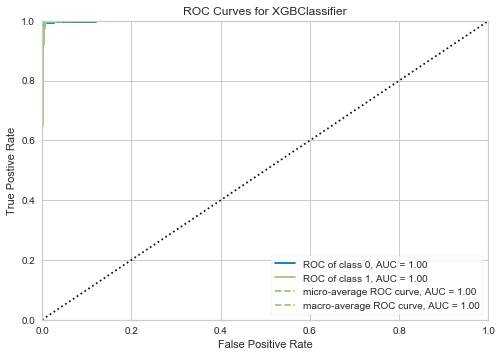

In [71]:
plot_model(xgboost_cl)

In [73]:
evaluate_model(xgboost_cl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [74]:
evaluate_model(xgboost_cl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [75]:
evaluate_model(xgboost_cl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [77]:
evaluate_model(xgboost_cl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [79]:
evaluate_model(xgboost_cl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [81]:
%matplotlib inline

In [99]:
df_tfidf_combined.columns

Index(['news_category', 'count_of_words', 'count_of_uppercase_words',
       'count_of_characters', 'avg_len_of_words', 'punctuation_count',
       'noun_count', 'verb_count', 'adjective_count', 'adverb_count',
       'pronoun_count', '10', '100', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '21', '21st', '21st century',
       '21st century wire', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '35', '40', '50', '60', 'abc', 'ability', 'able', 'absolutely',
       'abuse', 'accept', 'access', 'accord', 'account', 'accusation',
       'accuse', 'achieve', 'acknowledge', 'across', 'act', 'action',
       'activist', 'activity', 'actual', 'actually', 'add', 'addition',
       'additional', 'address', 'administration', 'admit', 'adopt', 'advance',
       'advantage', 'adviser', 'advocate', 'affair', 'affect', 'african',
       'age', 'agency', 'agenda', 'agent'

In [102]:
exp2 = setup(data = df_tfidf_combined, target = 'news_category', 
             ignore_features=['reuters', 'reuters president', 'reuters yous','reuters yous president', 
                              'tell reuters', 'washington reuters', 'washington reuters yous'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6541
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(44898, 1677)"
4,Missing Values,False
5,Numeric Features,1676
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [103]:
%time compare_models()

CPU times: user 3h 13min 3s, sys: 3min 5s, total: 3h 16min 8s
Wall time: 1h 19min 32s


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.9772,0,0.9819,0.9708,0.9763,0.9544
1,Light Gradient Boosting Machine,0.9754,0.997,0.9776,0.9712,0.9743,0.9508
2,CatBoost Classifier,0.9745,0.9975,0.9779,0.9691,0.9734,0.949
3,Linear Discriminant Analysis,0.9711,0.9957,0.9744,0.9655,0.9699,0.9421
4,Extra Trees Classifier,0.9664,0.9955,0.9738,0.9566,0.9651,0.9327
5,Gradient Boosting Classifier,0.9605,0.9926,0.9677,0.9506,0.959,0.921
6,Extreme Gradient Boosting,0.9595,0.992,0.9664,0.9498,0.958,0.9189
7,Ada Boost Classifier,0.9474,0.9879,0.952,0.9389,0.9453,0.8947
8,Random Forest Classifier,0.9364,0.984,0.9173,0.9477,0.9322,0.8723
9,Decision Tree Classifier,0.9038,0.9035,0.8967,0.9013,0.8988,0.8071


In [104]:
ridge_model = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9860,0.0,0.9840,0.9866,0.9853,0.9719
1,0.9707,0.0,0.9653,0.9731,0.9692,0.9413
2,0.9796,0.0,0.9840,0.9736,0.9788,0.9592
3,0.9695,0.0,0.9840,0.9535,0.9685,0.9389
4,0.9733,0.0,0.9707,0.9733,0.9720,0.9464
5,0.9784,0.0,0.9813,0.9735,0.9774,0.9567
6,0.9707,0.0,0.9840,0.9558,0.9697,0.9413
7,0.9834,0.0,0.9866,0.9788,0.9827,0.9668
8,0.9783,0.0,0.9920,0.9636,0.9776,0.9566
9,0.9822,0.0,0.9867,0.9763,0.9814,0.9643


In [115]:
interpret_model('ridge')

SystemExit: (Type Error): This function only supports tree based models for binary classification.

In [116]:
plot_model('ridge')

SystemExit: (Type Error): AUC plot not available for estimators with no predict_proba attribute.

In [112]:
evaluate_model(ridge_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [114]:
ridge_tune = tune_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9860,0.0,0.9840,0.9866,0.9853,0.9719
1,0.9707,0.0,0.9653,0.9731,0.9692,0.9413
2,0.9796,0.0,0.9840,0.9736,0.9788,0.9592
3,0.9695,0.0,0.9840,0.9535,0.9685,0.9389
4,0.9746,0.0,0.9733,0.9733,0.9733,0.9490
5,0.9784,0.0,0.9813,0.9735,0.9774,0.9567
6,0.9720,0.0,0.9866,0.9560,0.9711,0.9439
7,0.9834,0.0,0.9866,0.9788,0.9827,0.9668
8,0.9783,0.0,0.9920,0.9636,0.9776,0.9566
9,0.9822,0.0,0.9867,0.9763,0.9814,0.9643


In [117]:
LGBM = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9835,0.9989,0.9867,0.9788,0.9827,0.9669
1,0.9809,0.9980,0.9867,0.9737,0.9801,0.9618
2,0.9746,0.9965,0.9707,0.9759,0.9733,0.9490
3,0.9746,0.9975,0.9787,0.9683,0.9735,0.9490
4,0.9746,0.9953,0.9707,0.9759,0.9733,0.9490
5,0.9784,0.9974,0.9733,0.9812,0.9772,0.9566
6,0.9694,0.9961,0.9706,0.9654,0.9680,0.9387
7,0.9720,0.9955,0.9706,0.9706,0.9706,0.9438
8,0.9694,0.9970,0.9893,0.9487,0.9686,0.9388
9,0.9771,0.9981,0.9787,0.9735,0.9761,0.9541


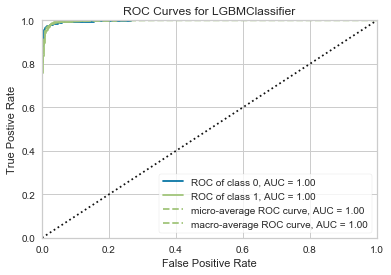

In [118]:
plot_model(LGBM)

In [119]:
evaluate_model(LGBM)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

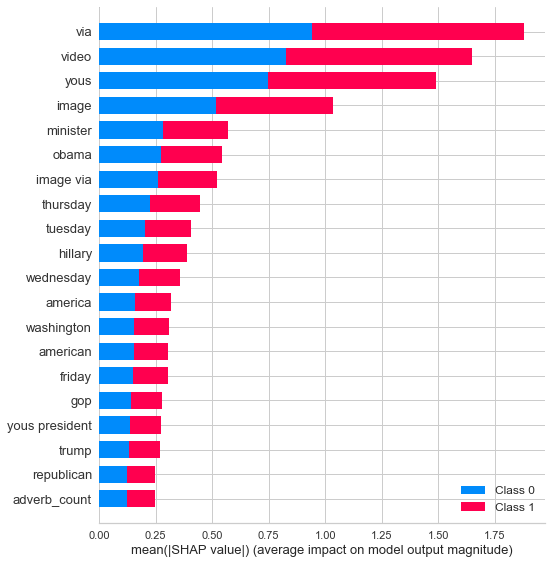

In [120]:
interpret_model(LGBM)